In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
import os
sys.path.append(os.path.abspath('../nn-classifiers/'))

In [3]:
import labeling_network as lbln
from matplotlib import pyplot as plt
import theano
import theano.tensor as T
import numpy as np
from labeling_network import FullyConnectedLayer, ConvPoolLayer

Running with a CPU.  If this is not desired, then the modify network3.py to set
the GPU flag to True.


In [15]:
import pylab
pylab.rcParams['figure.figsize'] = (6.0, 6.0)

In [4]:
dataPath = '../../TrainingData/LabeledData-2015-09-07/'

In [100]:
train_data, valid_data, test_data = lbln.load_data_shared(
                     dataPath,
                     'capture',
                     dataPath + 'labels.dat',
                     n_train=10,
                     n_validation=10,
                     n_test=10,
                     label_mask=1)

# Modify data tuples for autoencoder learning. Target output = input.
train_data = train_data[0], train_data[0]
valid_data = valid_data[0], valid_data[0]
test_data = test_data[0], test_data[0]

In [101]:
mini_batch_size = 10

### Train the Network. 

In [121]:
network = lbln.Network([

        FullyConnectedLayer(n_in=64*64*3, n_out=500, p_dropout=0.5),
        FullyConnectedLayer(n_in=500, n_out=64*64*3),
        
    ], mini_batch_size)

In [122]:
network.SGD(train_data, 
            50, 
            mini_batch_size, 
            20.0, 
            valid_data, 
            test_data,
            "one_layer_simple_ac"
           )

--- Training mini-batch number 0 ---
  Epoch 0: validation accuracy -0.048516
    This is the best validation accuracy to date.
      The corresponding test accuracy is -0.051503
    Current cost on training set: 0.0479948274648
  Epoch 1: validation accuracy -0.047428
    This is the best validation accuracy to date.
      The corresponding test accuracy is -0.050682
    Current cost on training set: 0.0464984791182
  Epoch 2: validation accuracy -0.046415
    This is the best validation accuracy to date.
      The corresponding test accuracy is -0.04993
    Current cost on training set: 0.045180508325
  Epoch 3: validation accuracy -0.045428
    This is the best validation accuracy to date.
      The corresponding test accuracy is -0.049209
    Current cost on training set: 0.0439320469854
  Epoch 4: validation accuracy -0.044439
    This is the best validation accuracy to date.
      The corresponding test accuracy is -0.048496
    Current cost on training set: 0.0426857530062
  Epo

#### Save network weights.

In [ ]:
network.save_as_file('ac')

In [112]:
train_data_xs = train_data[0].get_value()
train_data_ts = train_data[1].get_value()

test_data_xs = test_data[0].get_value()
test_data_ts = test_data[1].get_value()

valid_data_xs = valid_data[0].get_value()
valid_data_ts = valid_data[1].get_value()

0.0114990140489
0.0417339810209
mean: 0.575974392361
sq diff: 0.0328785747569


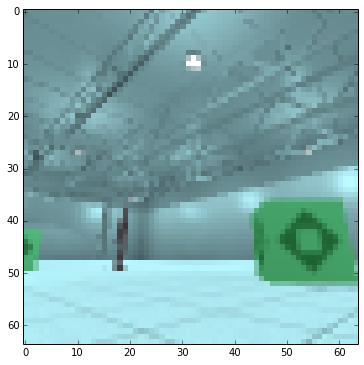

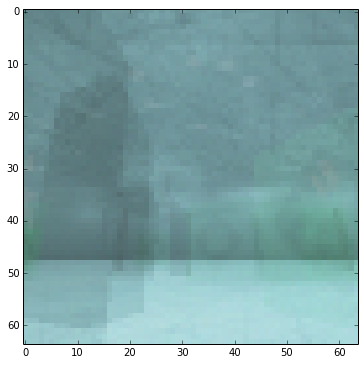

In [123]:
index = 5
inpt = train_data_xs[index]
output = network.get_single_output(inpt)
print np.mean((output - inpt) ** 2)

randomout = np.zeros(inpt.shape) + 0.5

print np.mean((randomout - inpt) ** 2)


print 'mean:', np.mean(train_data_xs)
print 'sq diff:', np.mean((inpt - np.mean(train_data_xs)) ** 2)

plt.imshow(inpt.reshape((64, 64, 3)), interpolation='nearest')
plt.show()
plt.imshow(output.reshape((64, 64, 3)), interpolation='nearest')
plt.show()